# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [39]:
from pandas import read_csv as rcsv, DataFrame
from matplotlib import pyplot as plt
from seaborn import countplot as ctt, barplot as bpt

df = rcsv('sinasc_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

<Axes: xlabel='GESTACAO', ylabel='count'>

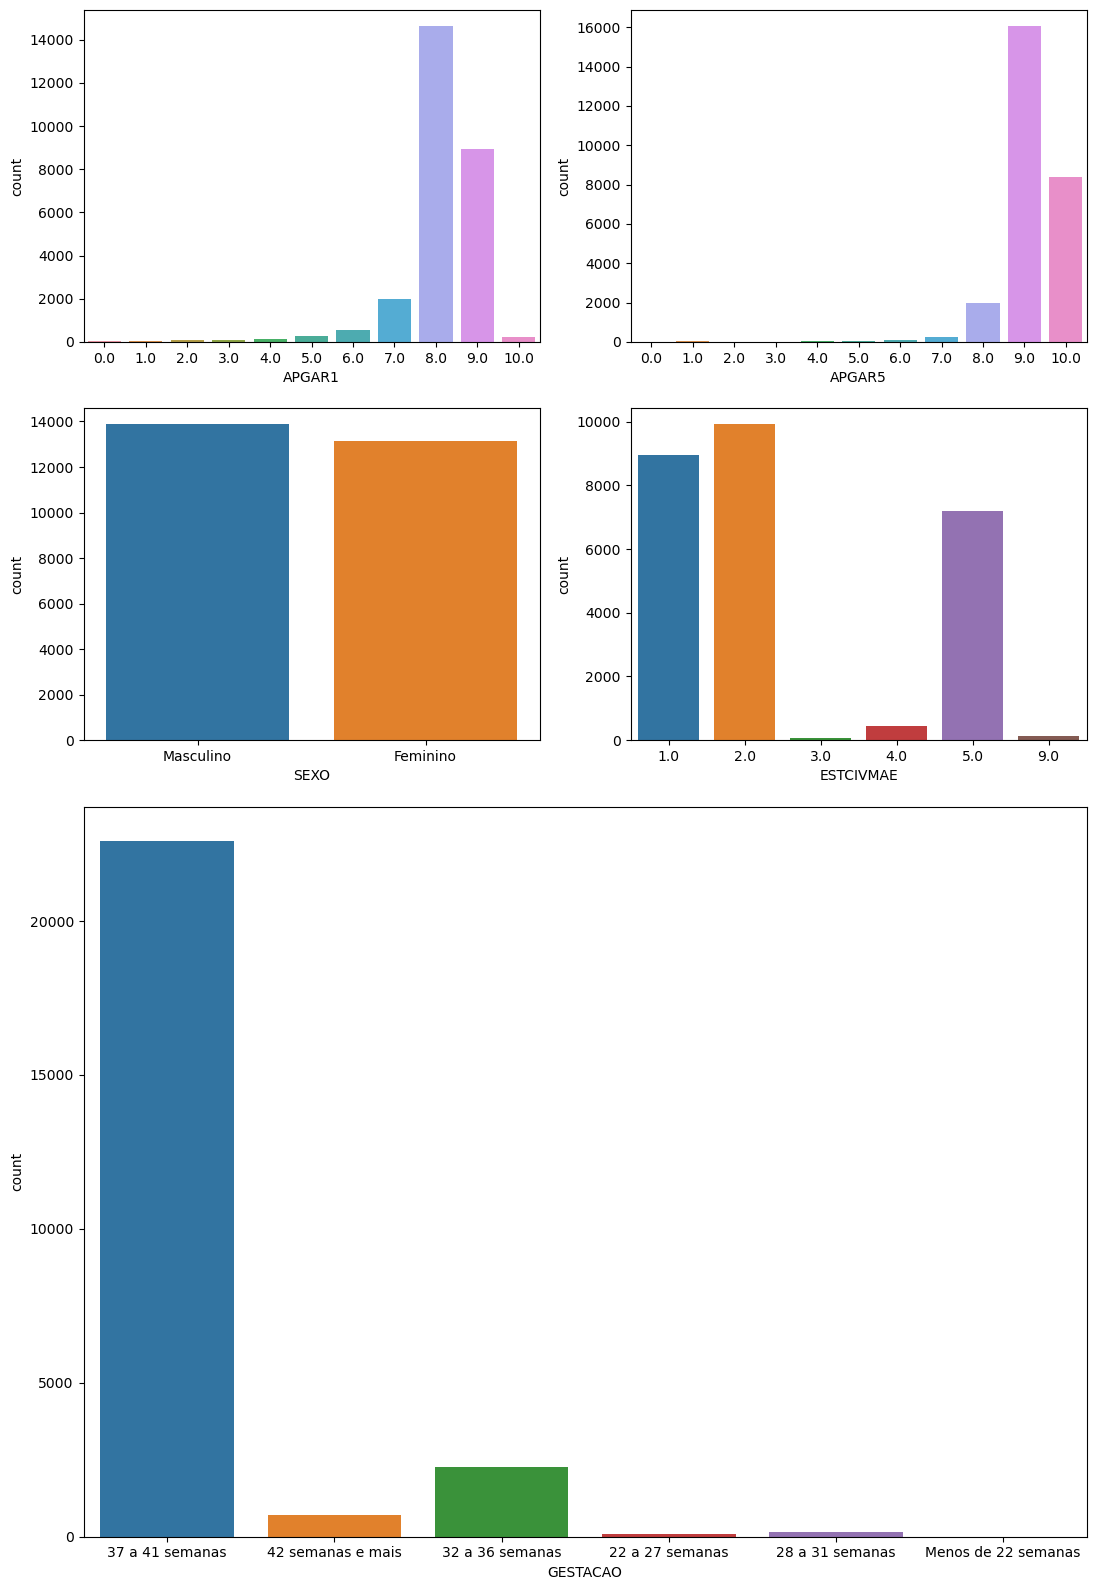

In [2]:
# Configurando figura
plt.figure(figsize=(20, 25))

# Tamanho da grid
gridsize = (5, 3)

# Definindo os graficos em cada grid
apgar1 = plt.subplot2grid(gridsize, (0, 0))
apgar5 = plt.subplot2grid(gridsize, (0, 1))
sexo = plt.subplot2grid(gridsize, (1, 0))
estcivmae = plt.subplot2grid(gridsize, (1, 1))
gestacao = plt.subplot2grid(gridsize, (2, 0), colspan=2, rowspan=2)

# Adicionando os dados e seus lugares
ctt(ax = apgar1, x='APGAR1', data=df)
ctt(ax = apgar5, x='APGAR5', data=df)
ctt(ax = sexo, x='SEXO', data=df)
ctt(ax = estcivmae, x='ESTCIVMAE', data=df)
ctt(ax = gestacao, x='GESTACAO', data=df)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='APGAR5', ylabel='MEDIA'>

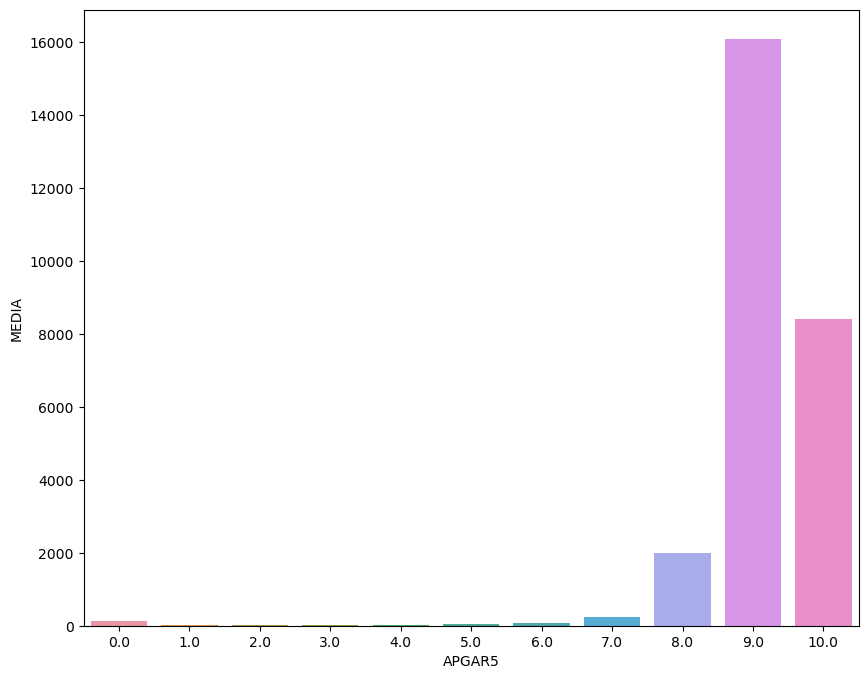

In [60]:
# Verificando valores nulos
df['APGAR5'].isnull().sum()

# Substituindo valores
# df['APGAR5'].fillna(0, inplace=True) Será descontinuado
df.fillna({ 'APGAR5': 0 }, inplace=True)

# Valores unicos 
val_uniques = df['APGAR5'].unique()

# Agrupando e tirando a media
media = df.groupby(['APGAR5']).size().groupby(level=0).mean()

# Reorganizando o index
category_media = media.reset_index()
category_media.columns = ['APGAR5', 'MEDIA']

# Criando grafico
plt.close('all')
plt.figure(figsize=(10, 8))
figApgar5 = plt.subplot()
bpt(x='APGAR5', y='MEDIA', data=category_media)


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<Axes: xlabel='CONSULTAS', ylabel='count'>

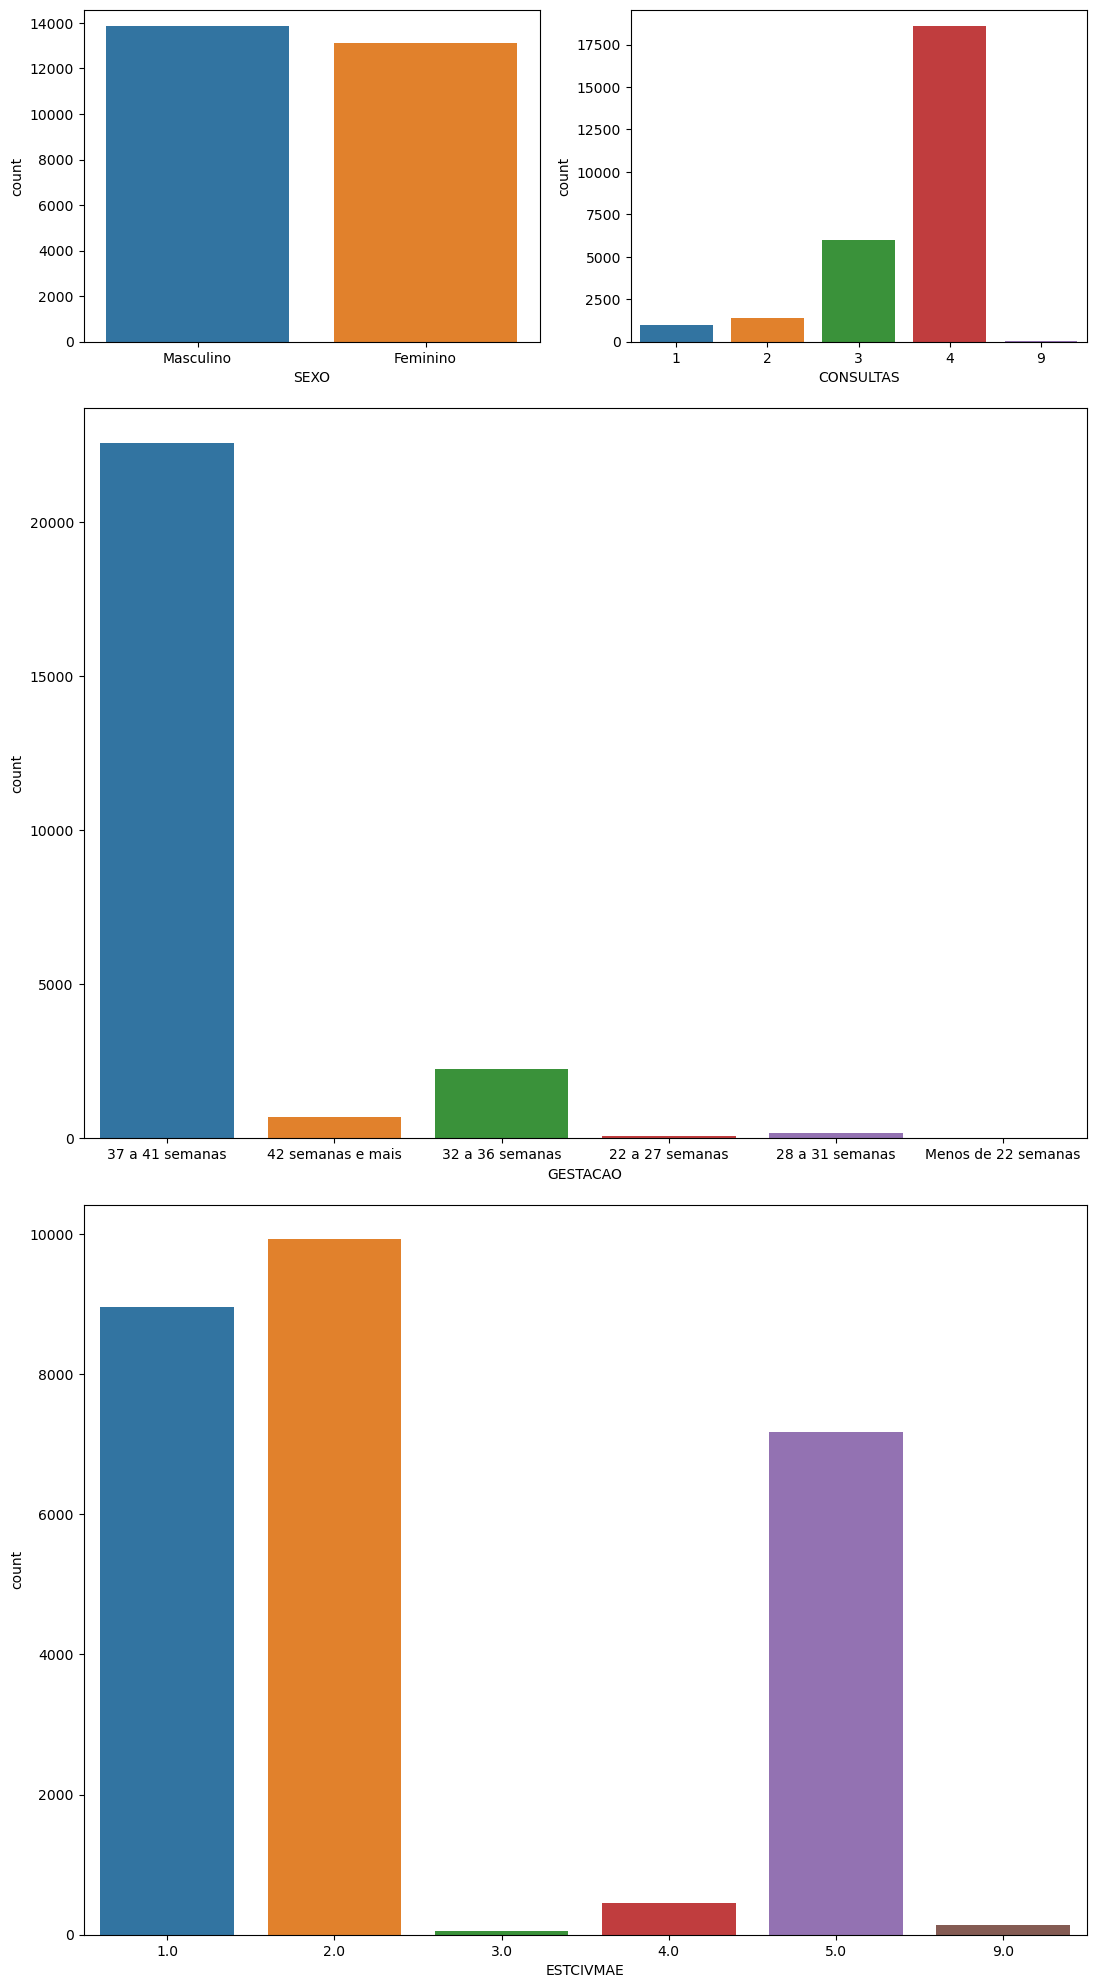

In [22]:
plt.close('all')

# Configurando figura
plt.figure(figsize=(20, 25))

# Tamanho da grid
gridsize = (5, 3)

# Definindo os graficos em cada grid, para uma organização melhor
sexo = plt.subplot2grid(gridsize, (0, 0))
consultas = plt.subplot2grid(gridsize, (0, 1))
gestacao = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=2)
estcivmae = plt.subplot2grid(gridsize, (3, 0), colspan=2, rowspan=2)


# Adicionando os dados e seus lugares
ctt(ax=sexo, x='SEXO', data=df)
ctt(ax=gestacao, x='GESTACAO', data=df)
ctt(ax=estcivmae, x='ESTCIVMAE', data=df)
ctt(ax=consultas, x='CONSULTAS', data=df)